In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True, precision=8)
import os
import sys
import tensorflow as tf

sys.path.append('../')
sys.path.append('../compression')

import dataset
import dataset_loaders
import neural_networks.feed_forward_neural_network as ffnn
import neural_networks.recurrent_neural_network as rnn
import neural_networks.utils
import run_compression

In [95]:
# set config
flags = run_compression.FLAGS
# flags.dataset_filepath = '../../data/datasets/debug/static_deterministic.h5'
flags.dataset_filepath = '../../data/datasets/debug/static_nondeterministic.h5'
flags.input_dim = 40
flags.target_index = 2
flags.output_dim = 1
flags.num_epochs = 10

In [96]:
# load data
data = dataset_loaders.risk_dataset_loader(
        flags.dataset_filepath, shuffle=False, train_split=.9, 
        debug_size=flags.debug_size, timesteps=flags.timesteps,
        num_target_bins=flags.num_target_bins, 
        balanced_class_loss=flags.balanced_class_loss, 
        target_index=flags.target_index)
unnormalized_data = dataset_loaders.risk_dataset_loader(
        flags.dataset_filepath, shuffle=False, train_split=.9, 
        debug_size=flags.debug_size, timesteps=flags.timesteps,
        num_target_bins=flags.num_target_bins, 
        balanced_class_loss=flags.balanced_class_loss, 
        target_index=flags.target_index,
        normalize=False)
d = dataset.Dataset(data, flags)

In [97]:
# fit the dataset
tf.python.reset_default_graph()
session = tf.InteractiveSession()
network = ffnn.FeedForwardNeuralNetwork(session, flags)
network.fit(d)

INFO:tensorflow:Scale of 0 disables regularizer.
epoch: 0	train loss: 0.505470	val loss: 0.389681	time: 0.1162
epoch: 1	train loss: 0.278695	val loss: 0.247997	time: 0.6368
epoch: 2	train loss: 0.184147	val loss: 0.177449	time: 1.0154
epoch: 3	train loss: 0.138053	val loss: 0.139282	time: 1.4538
epoch: 4	train loss: 0.112845	val loss: 0.116959	time: 2.1330
epoch: 5	train loss: 0.097646	val loss: 0.102460	time: 2.6561
epoch: 6	train loss: 0.087830	val loss: 0.091957	time: 3.1222
epoch: 7	train loss: 0.081031	val loss: 0.084079	time: 3.5913
epoch: 8	train loss: 0.076030	val loss: 0.078483	time: 4.0197
epoch: 9	train loss: 0.072388	val loss: 0.074491	time: 4.9129


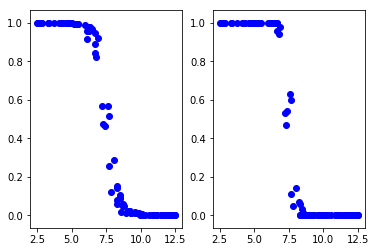

In [98]:
# static deterministic visualization
fore_range_index = 9 # 173
pred = network.predict(data['x_val'])
plt.subplot('121')
plt.scatter(unnormalized_data['x_val'][:,fore_range_index], pred, c='blue')
plt.subplot('122')
plt.scatter(unnormalized_data['x_val'][:,fore_range_index], unnormalized_data['y_val'], c='blue')
plt.show()


In [69]:
print(unnormalized_data['x_train'][0])

[ 50.          50.          50.          50.          50.          50.          50.
  50.          50.           4.8266224   50.          50.          50.          50.
  50.          50.          50.          50.          50.          50.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.          -5.10661546   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
